<a href="https://colab.research.google.com/github/pro-deva-27/GoldPricePrediction_RandomForestRegressor/blob/master/Gold_Price_Prediction_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [94]:
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [95]:
gold_data.tail() # Printing last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [96]:
gold_data.shape

(2290, 6)

In [97]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [98]:
gold_data.isnull().sum()  # Checking for missing values (in each column)

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [99]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [100]:
gold_data = gold_data.drop('Date',axis=1) # Removing Date column from dataset
gold_data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [101]:
# Correlation
correlation = gold_data.corr()

<Axes: >

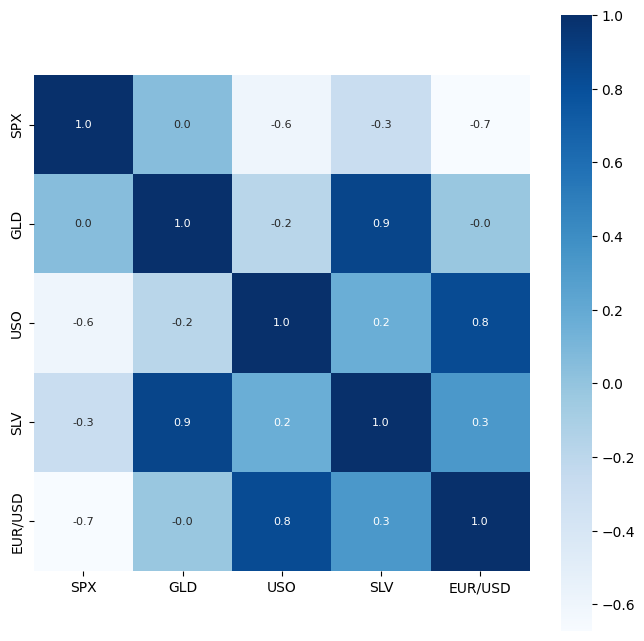

In [102]:
# Heatmap Construction for understanding correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [103]:
# Correlation Values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-104-2a7050b487b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

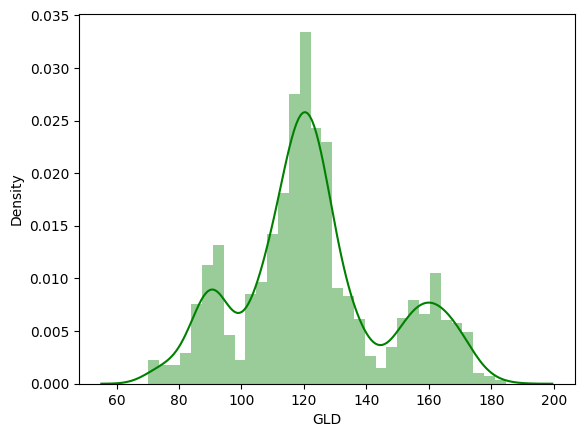

In [104]:
# Check Distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

In [105]:
# Splitting Features and Labels
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']


In [106]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [107]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


In [108]:
# Splitting in Training and Testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [109]:
X.shape,X_train.shape,X_test.shape

((2290, 4), (1832, 4), (458, 4))

In [110]:
Y.shape,Y_train.shape,Y_test.shape

((2290,), (1832,), (458,))

In [111]:
# Model Training Phase
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [112]:
# Model Evaluation
test_data_accuracy = model.predict(X_test)

In [113]:
print(test_data_accuracy)

[168.60259965  82.00089985 116.05719945 127.49280073 120.79600129
 154.73079645 150.3570986  126.1269999  117.47689869 125.9229009
 116.75510103 171.93810089 141.4952988  168.0005987  115.27500008
 117.52520021 138.59390306 170.36200066 159.61190328 158.99459936
 155.17270073 125.71310024 176.04559974 157.29380267 125.17140041
  93.87799963  77.41580004 120.44530038 119.09989944 167.42879919
  88.16350084 125.23979989  90.86390051 117.6618999  121.15539882
 137.25610097 115.4306015  115.17050062 147.58809938 107.04730111
 104.07550237  87.1842978  126.49210042 118.20420012 153.18839827
 119.55720028 108.43069953 108.11929807  93.27420054 126.98869813
  75.09840027 113.72379937 121.22199986 111.42269963 119.05229896
 120.37939941 158.96710076 167.58660128 146.93899655  85.52579823
  94.35120042  86.73589911  90.7148001  119.04970054 126.44100043
 127.65719984 168.59879956 122.2431994  117.4562989   98.74320021
 168.2992018  142.84729761 132.29580181 121.2158023  121.3218993
 119.6661004

In [114]:
# R squared error
error_score  = metrics.r2_score(Y_test, test_data_accuracy)
print("R squared error : ",error_score)

R squared error :  0.9894360196908062


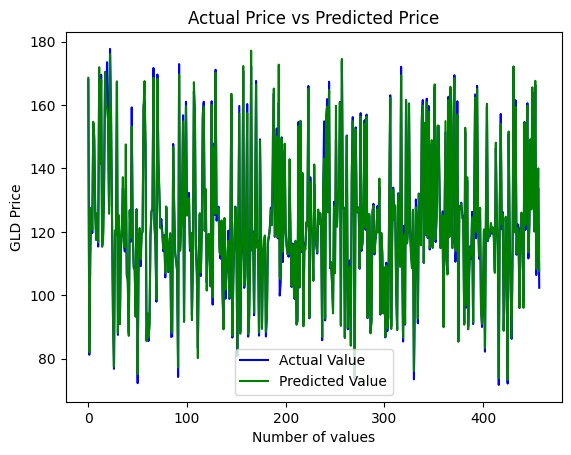

In [115]:
# Compare Actual Values and Predicted Values in a plot
Y_test = list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_accuracy,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()